In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 



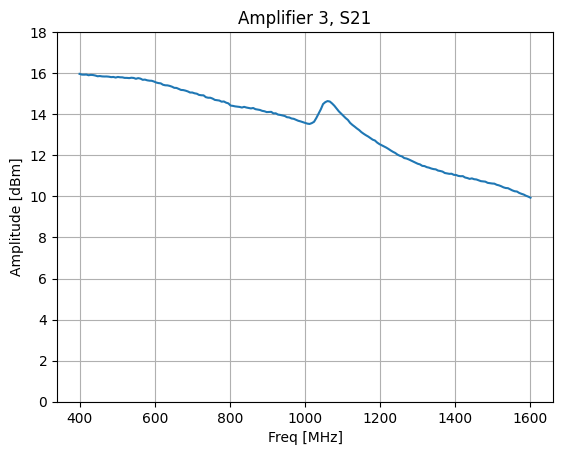

In [3]:
file_path = './S21/AMP3_S21.csv'
file_path_cal = './S21/CAL_2.csv'
df = pd.read_csv(file_path, skiprows=18, names=["Frequency", "dB"]) 

cal = pd.read_csv(file_path_cal, skiprows=18, names=["Frequency", "dB"])

attenuation_floor = -20.35 #dB

df['Frequency'] = df['Frequency'].astype(float) / 1e6
df['dB'] = df['dB'].astype(float) - cal['dB'].astype(float)


# Plot the data
plt.plot(df['Frequency'], df['dB'])
plt.grid(True)
plt.xlabel("Freq [MHz]")
plt.ylabel("Amplitude [dBm]")

plt.ylim(ymin=0, ymax=18)

plt.title("Amplifier 3, S21")

# plt.savefig("./S21/amp3_s21.png", dpi=300, bbox_inches="tight")
plt.show()

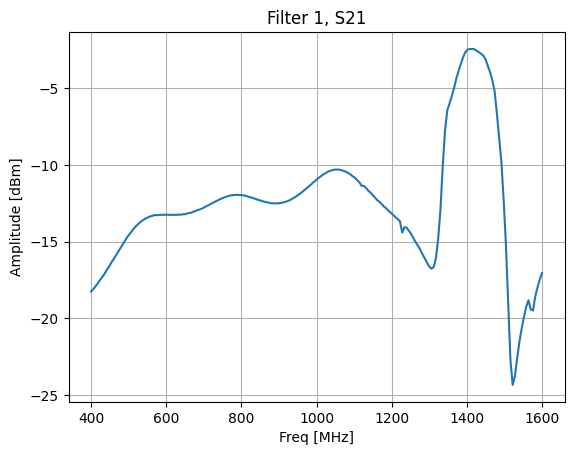

In [4]:
file_path = './S21/FIL1_S21.csv'
df = pd.read_csv(file_path, skiprows=18, names=["Frequency", "dB"])  

attenuation_floor = -0.6261 #dB


df['Frequency'] = df['Frequency'].astype(float) / 1e6
df['dB'] = df['dB'].astype(float) - attenuation_floor

# Plot the data
plt.plot(df['Frequency'], df['dB'])
plt.grid(True)
plt.xlabel("Freq [MHz]")
plt.ylabel("Amplitude [dBm]")
plt.title("Filter 1, S21")

plt.savefig("./S21/filter1_s21.png", dpi=300, bbox_inches="tight")
plt.show()

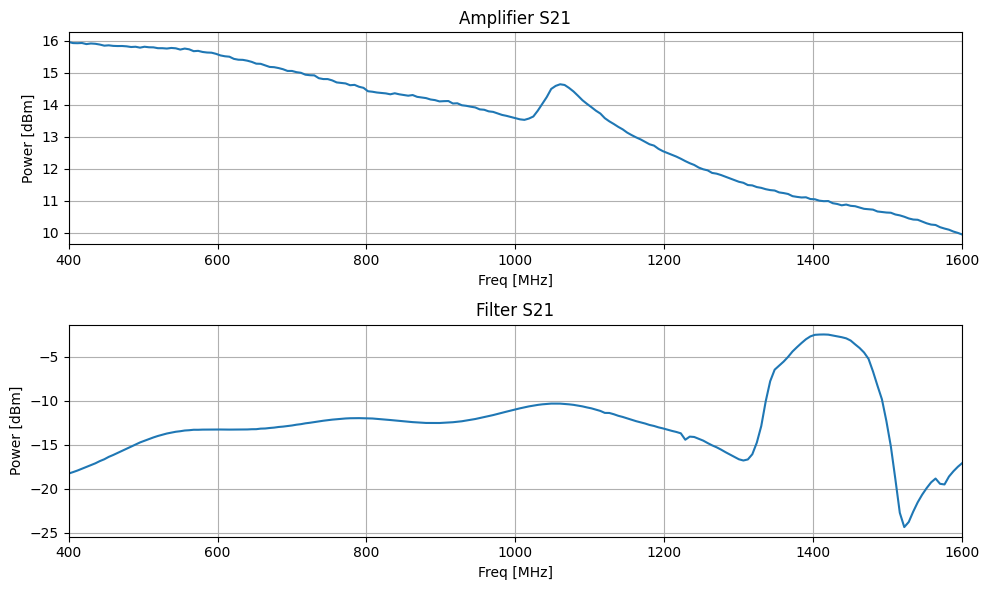

In [5]:


def plot_graph(ax, file_path, file_path_cal, cal_floor, label):
    df = pd.read_csv(file_path, skiprows=18, names=["Frequency", "dB"]) 

    df['Frequency'] = df['Frequency'].astype(float) / 1e6
    
    if cal_floor == 0:
        cal = pd.read_csv(file_path_cal, skiprows=18, names=["Frequency", "dB"])
        df['dB'] = df['dB'].astype(float) - cal['dB'].astype(float)
    else:
        cal = cal_floor
        df['dB'] = df['dB'].astype(float) - cal

    ax.plot(df['Frequency'], df['dB'], label=label)
    ax.grid(True)
    ax.set_xlabel("Freq [MHz]")
    ax.set_ylabel("Power [dBm]")
    # ax.set_ylim(ymin=0, ymax=18)
    ax.set_xlim(xmin=400, xmax=1600)
    ax.set_title(label)

# File paths for each subplot
label = ['Amplifier S21', 'Filter S21', 'Amp', 'Amp' ]
file_paths = ['./S21/AMP3_S21.csv', './S21/FIL1_S21.csv', './S21/AMP3_S21.csv', './S21/AMP3_S21.csv']
file_paths_cal = ['./S21/CAL_2.csv', './S21/CAL_2.csv', './S21/CAL_2.csv', './S21/CAL_2.csv']

#cal floor
cal_floor = [0, -0.625, 0, 0]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Plot each graph in the 2x2 grid
for i, ax in enumerate(axs.flat):
    plot_graph(ax, file_paths[i], file_paths_cal[i], cal_floor[i], label[i])

plt.tight_layout()
plt.savefig("S21_measurements.svg")
plt.show()

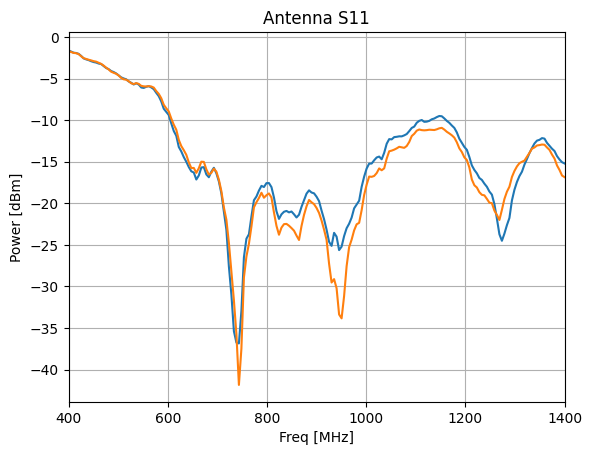

In [6]:
label = "Antenna S11"
antenna_s11 = "./S11/s11_antenna_run2.csv"
antenna_s11_2 = "./S11/s11_antenna.csv"

df = pd.read_csv(antenna_s11, skiprows=7, names=["Frequency", "dB", 'deg'], index_col=False)
df2 = pd.read_csv(antenna_s11_2, skiprows=7, names=["Frequency", "dB", 'deg'], index_col=False)


df['Frequency'] = df['Frequency'].astype(float) / 1e6
df['dB'] = df['dB'].astype(float)

df2['Frequency'] = df2['Frequency'].astype(float) / 1e6
df2['dB'] = df2['dB'].astype(float)

plt.plot(df['Frequency'], df['dB'], label=label)
plt.plot(df2['Frequency'], df2['dB'], label=label)

plt.grid(True)
plt.xlabel("Freq [MHz]")
plt.ylabel("Power [dBm]")
# ax.set_ylim(ymin=0, ymax=18)
plt.xlim(xmin=400, xmax=1400)
plt.title(label)
plt.savefig("Antenna_S11.svg")
plt.show()

       Frequency         dB      Phase
0       15500000 -82.995697   3.805083
1       16000000 -82.635551   6.214417
2       16500000 -84.522972  -2.353365
3       17000000 -83.059624  -7.346672
4       17500000 -83.274872 -19.023708
...          ...        ...        ...
9965  4998000000 -38.428467  68.202698
9966  4998500000 -38.529736  64.741653
9967  4999000000 -38.326027  60.414009
9968  4999500000 -38.332050  58.065773
9969  5000000000 -38.192703  54.279766

[9970 rows x 3 columns]


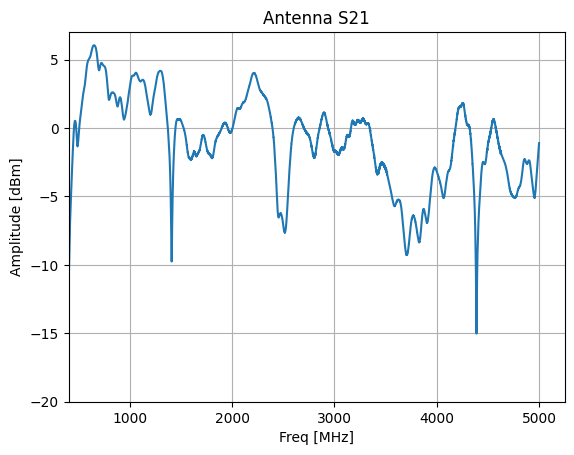

In [49]:
file_paths = ['./S21/ANT21_4CLOS-2.csv', './S21/ANT21_4CLOSE.csv']
multi_run = []

df_far = ['./S21/ANT21_2.csv', './S21/ANT21_3.csv']
df_close = ['./S21/ANT21_4CLOS-2.csv', './S21/ANT21_4CLOSE.csv']

df_very_close = ['./S21/S21_ANTENNA_WIDE.csv']

cal = pd.read_csv('./S21/ANT21CAL.csv', skiprows=18, index_col=False, names=["Frequency", "dB", "Phase"], )  
cal_dB = cal["dB"].astype(float)

for file_path in df_very_close:
    df = pd.read_csv(file_path, skiprows=18, names=["Frequency", "dB", "Phase"], index_col=False)  
    print(df)
    
    # d = 1.3 #long distance test
    d = 0.3 #rfi box test
    
    df['Frequency'] = df['Frequency'].astype(float)
    df['dB'] = df['dB'].astype(float) 

    # plt.plot(df['Frequency'], df['dB'])
    # Plot the data
    
    def adjust_db(row):
        dB = row['dB']
        frequency = row['Frequency']
    
        
        adjusted_db = 0.5*(dB - 20*np.log10(3e8/(frequency*4*np.pi*d)))
        return adjusted_db
    
    # Apply the function to the dB column
    df['adjusted_dB'] = df.apply(adjust_db, axis=1)
    plt.plot(df['Frequency']/1e6,df['adjusted_dB'])
    
    multi_run.append(df['adjusted_dB'])


avg = np.mean(np.vstack(multi_run), axis=0)

# plt.plot(df['Frequency']/1e6,avg)
plt.grid(True)
plt.xlabel("Freq [MHz]")
plt.xlim(left=400)
plt.ylim(-20, 7)
plt.ylabel("Amplitude [dBm]")
plt.title("Antenna S21")

plt.savefig("./Figs/antenna_s21.pdf")
plt.show()

***GAIN CAL***


0       18.717988
1       18.847475
2       18.968774
3       19.086269
4       19.203175
          ...    
9965    -6.078831
9966    -6.102562
9967    -6.126682
9968    -6.146687
9969    -6.168608
Name: dB, Length: 9970, dtype: float64


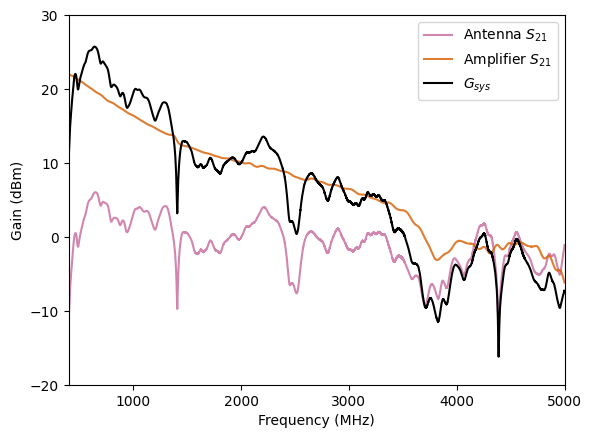

In [114]:
label = "Antenna S11"
antenna_s11 = "./S11/s11_antenna_run2.csv"
antenna_s11_2 = "./S11/s11_antenna.csv"

antenna_1 = pd.read_csv(antenna_s11, skiprows=7, names=["Frequency", "dB", 'deg'], index_col=False)
antenna_2 = pd.read_csv(antenna_s11_2, skiprows=7, names=["Frequency", "dB", 'deg'], index_col=False)


antenna_1['Frequency'] = antenna_1['Frequency'].astype(float) 
antenna_1['dB'] = antenna_1['dB'].astype(float)

antenna_2['Frequency'] = antenna_2['Frequency'].astype(float) 
antenna_2['dB'] = antenna_2['dB'].astype(float)

# file_path = './S21/AMP3_S21.csv'
file_path = './S21/S21_AMP_WIDE.csv'
# file_path_cal = './S21/CAL_2.csv'

amp = pd.read_csv(file_path, skiprows=18, names=["Frequency", "dB", "Phase"], index_col=False)

# cal = pd.read_csv(file_path_cal, skiprows=18, names=["Frequency", "dB"])
attenuation_floor = -10 #dB


amp['Frequency'] = amp['Frequency'].astype(float)
amp['dB'] = amp['dB'].astype(float) - attenuation_floor

plt.plot(amp['Frequency']/1E6, avg, label=r"Antenna $S_{21}$", alpha=0.9, color="#cc79a7")
plt.plot(amp['Frequency']/1E6, amp['dB'], label="Amplifier $S_{21}$", alpha=0.8, color="#d55e00")

# plt.vlines(700, -40, 5)
# plt.xlim(2500, 2570)
total_gain = avg + amp['dB']
print(amp['dB'])
plt.plot(amp['Frequency']/1E6, total_gain, label=r"$G_{sys}$", color="k")
plt.legend()
plt.ylim(-20, 30)
plt.xlim(400, 5000)
plt.xlabel("Frequency (MHz)")
plt.ylabel(r"Gain (dBm)")

amp['dB'] = avg*0 + amp['dB']

gain_cal_filename = "gain_cal.csv"
amp.to_csv(gain_cal_filename, sep=',')

plt.savefig("./Figs/gain_plot.svg")


0       18.717988
1       18.847475
2       18.968774
3       19.086269
4       19.203175
          ...    
9965    -6.078831
9966    -6.102562
9967    -6.126682
9968    -6.146687
9969    -6.168608
Name: dB, Length: 9970, dtype: float64
18.717988
0      41.052128
1      52.503502
2      37.162432
3      54.345085
4      39.903191
         ...    
995    64.351147
996    56.359003
997    65.165291
998    50.890934
999    65.123917
Name: -76.5706329345703, Length: 1000, dtype: float64


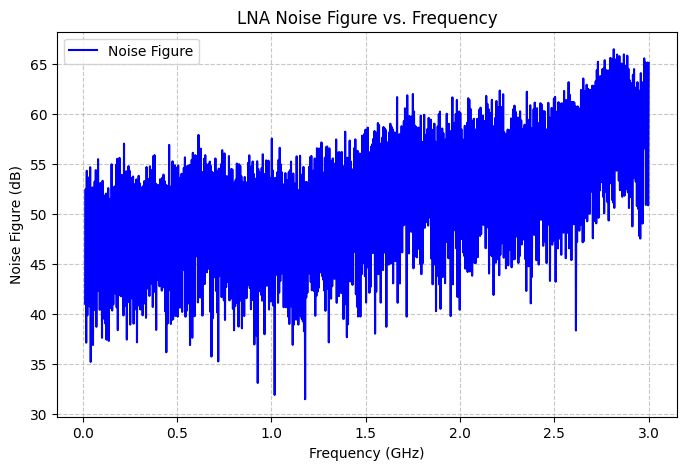

Noise Figure calculation complete! Results saved to 'lna_noise_figure.csv'.


In [113]:
import pandas as pd
import numpy as np

# Constants
B = 1E6  # Resolution bandwidth in Hz (adjust based on measurement setup)
k = 1.38e-23  # Boltzmann's constant
T0 = 290  # Standard reference temperature in Kelvin

# Load noise power data (Frequency in Hz, Power in dBm)
noise_data = pd.read_csv("./Noise/amp_noise_50_2.csv", skiprows=45, index_col=False)
freq_noise = noise_data.iloc[:, 0]  # First column: Frequency (Hz)
P_dBm = noise_data.iloc[:, 1]  # Second column: Power (dBm)

# Convert power from dBm to Watts
P_Watts = 10**(P_dBm / 10) * 1e-3  

# Load gain data (Frequency in Hz, Gain in dB)
gain_data = pd.read_csv('./S21/S21_AMP_WIDE.csv', skiprows=18, names=["Frequency", "dB", "Phase"], index_col=False)
freq_gain = gain_data.iloc[:, 0]  # First column: Frequency (Hz)
G_dB = gain_data.iloc[:, 1] + 10  # Second column: Gain (dB)


print(G_dB)
# Interpolate gain data to match noise measurement frequencies
G_interp_dB = np.interp(400, freq_gain, G_dB)  

print(G_interp_dB)
G_lin = 10**(G_interp_dB / 10)  # Convert dB to linear gain

# Compute LNA noise temperature
T_LNA = P_Watts / (k * B * G_lin)  

# Compute Noise Figure (NF)
NF = 10 * np.log10(1 + (T_LNA / T0))

print(NF)
# Save results to CSV
# results = pd.DataFrame({"Frequency (Hz)": freq_noise, "Noise Figure (dB)": NF})
# results.to_csv("lna_noise_figure.csv", index=False)

plt.figure(figsize=(8, 5))
plt.plot(freq_noise / 1e9, NF, linestyle='-', color='b', label="Noise Figure")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Noise Figure (dB)")
plt.title("LNA Noise Figure vs. Frequency")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()
print("Noise Figure calculation complete! Results saved to 'lna_noise_figure.csv'.")
